# Projeto de Análise de Dados com Linguagem Python

## Projeto 9

### Relatório de Análise Estatística com Linguagem Python

In [ ]:
#!pip install -q -U watermark

In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [3]:
%reload_ext watermark
%watermark -a "Leonardo da Silva Neves"

Author: Leonardo da Silva Neves



Carregando e Compreendendo o Conjunto de Dados

In [5]:
df = pd.read_csv('Cap13/dataset.csv')

In [6]:
df.shape

(500, 8)

In [7]:
# Visualizando as cinco primeiras linhas
df.head()

,ID Mouse,Medicamento,Sexo,Idade_Meses,Peso (g),Timepoint,Tumor Volume (mm3),Sitios Metastáticos
0,m000,Placebo,Masculino,18,21,0,45.780350,2
1,m000,Ramicane,Masculino,24,17,5,42.728114,0
2,m000,Ramicane,Feminino,19,23,10,40.827502,1
3,m000,Capomulin,Feminino,21,23,15,38.578206,2
4,m000,Infubinol,Masculino,12,17,20,35.094393,2


**Tipo de Medicamentos**

**Placebo**: Um placebe é uma substância sem qualquer efeito terapêutico, usanda como controle em experimentos. Ao administrar um placebo a um grupo
de camundongos, os pesquisadores podem estabelecer uma linha de base para comparar o efeitos dos medicamentos reais. Isso ajuda a determinar se a mudança observada nos grupos tratados são devidos ao medicamento em teste ou a outros fatores externos.

**Remicane e Capomulin**: São exemplos de medicamentos reais usandos frequentemente em estudos para tratar ou comprolar o crecimento de tumores.
Esses medicamentos podem ter mecanismos de ação especificos, como inibir o crescimento de células cancerígenas ou reduzir a inflamação que promove o crescimento do tumor.

**Infubinol**: Outro tipo de medicamento que pode ser usado em estudos para avaliar sua eficácia na prevenção ou redução de crescimento de tumores em camudongos. Como os demais, sua inclusão no estudo visa testar sua eficácia e potenciais efeitos colaterais.

In [8]:
# Resumo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID Mouse             500 non-null    object 
 1   Medicamento          500 non-null    object 
 2   Sexo                 500 non-null    object 
 3   Idade_Meses          500 non-null    int64  
 4   Peso (g)             500 non-null    int64  
 5   Timepoint            500 non-null    int64  
 6   Tumor Volume (mm3)   500 non-null    float64
 7   Sitios Metastáticos  500 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 31.4+ KB


**Limpeza Inicial do Dodos**

In [9]:
# Nome das coluna
df.columns

Index(['ID Mouse', 'Medicamento', 'Sexo', 'Idade_Meses', 'Peso (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Sitios Metastáticos'],
      dtype='object')

In [11]:
# Valores únicos para ID de mouses
df['ID Mouse'].nunique()

100

In [12]:
# Verificando valores ausentes
df.isna().any()

ID Mouse               False
Medicamento            False
Sexo                   False
Idade_Meses            False
Peso (g)               False
Timepoint              False
Tumor Volume (mm3)     False
Sitios Metastáticos    False
dtype: bool

In [13]:
# Extrair duplicatas na combinação "ID Mouse" e "Timepoint" (Se houver)
duplicated_ID = df.loc[df.duplicated(subset = ["ID Mouse", "Timepoint"]), "ID Mouse"].unique()

In [14]:
# Se houver duplicatas, remove
df_f = df[df["ID Mouse"].isin(duplicated_ID) == False]

In [16]:
df_f.shape

(500, 8)

In [17]:
df_f.head()

,ID Mouse,Medicamento,Sexo,Idade_Meses,Peso (g),Timepoint,Tumor Volume (mm3),Sitios Metastáticos
0,m000,Placebo,Masculino,18,21,0,45.780350,2
1,m000,Ramicane,Masculino,24,17,5,42.728114,0
2,m000,Ramicane,Feminino,19,23,10,40.827502,1
3,m000,Capomulin,Feminino,21,23,15,38.578206,2
4,m000,Infubinol,Masculino,12,17,20,35.094393,2


**Sumário Estatístico**

In [18]:
# Nome das colunas
df_f.columns

Index(['ID Mouse', 'Medicamento', 'Sexo', 'Idade_Meses', 'Peso (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Sitios Metastáticos'],
      dtype='object')

In [29]:
# Agrupamento pelo medicamento e filtro pela variável "Tumor Volume (mm3)"
df_f_agrup = df_f.groupby("Medicamento")["Tumor Volume (mm3)"]

In [20]:
# Agora calcular  as estatísticas da variável "Tumor Volume (mm3)"
media =df_f_agrup.mean()
mediana = df_f_agrup.median()
variancia = df_f_agrup.var()
desvio_padrao = df_f_agrup.std()
sem = df_f_agrup.sem() # erro

In [22]:
# Criar um dataframe de sumário
df_sum_est = pd.DataFrame({'Média': media,
                           'Mediana': mediana,
                           'Variância': variancia,
                           'Desvio Padrão': desvio_padrao,
                           'SEM': sem})

In [24]:
df_sum_est

,Média,Mediana,Variância,Desvio Padrão,SEM
Medicamento,,,,,
Capomulin,39.952874,40.162141,19.485353,4.414222,0.396409
Infubinol,39.527638,39.598429,22.306899,4.723018,0.436643
Placebo,40.204385,40.072851,22.427712,4.735790,0.421898
Ramicane,40.437902,40.682981,16.588849,4.072941,0.353169


In [25]:
# Alternativa para agrupamento e calculo das estatísticas
sumario_agregado = df_f_agrup.agg(["mean", "median", "var", "std", "sem"])

**As funções usada aqui são:**

- mean: Calcúla a média aritmética dos dados.
- median: Determina o valor mediano dos dados.
- var: Calcula a variância dos dados, uma medida de dispersão que mostra quão distânte os valores estão da média.
- std: Determina o desvio padrão, que é a raiz quadrada da variância e fornece uma medida de quão espalhados estão os valores em relação a média.
- sem: Calcula o erro padrão da média (standard error os the mean), que indica a precisão da média como uma estimatíva da média populacional.

In [27]:
sumario_agregado

,mean,median,var,std,sem
Medicamento,,,,,
Capomulin,39.952874,40.162141,19.485353,4.414222,0.396409
Infubinol,39.527638,39.598429,22.306899,4.723018,0.436643
Placebo,40.204385,40.072851,22.427712,4.735790,0.421898
Ramicane,40.437902,40.682981,16.588849,4.072941,0.353169


**Análise Exploratória**

In [30]:
# Nomes das Colunas
df_f.columns

Index(['ID Mouse', 'Medicamento', 'Sexo', 'Idade_Meses', 'Peso (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Sitios Metastáticos'],
      dtype='object')

In [32]:
# Registros por medicamento
df_f["Medicamento"].value_counts()

Medicamento
Ramicane     133
Placebo      126
Capomulin    124
Infubinol    117
Name: count, dtype: int64

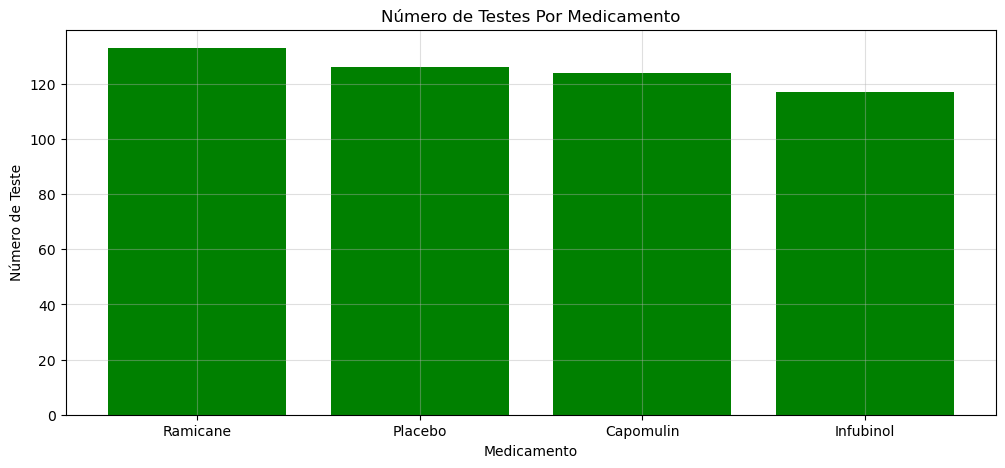

In [34]:
# Número de Testes Por Medicamento

# Plot
plt.figure(figsize = (12, 5))
x_axis = df_f['Medicamento'].value_counts().index.values
y_axis = df_f['Medicamento'].value_counts().values
plt.bar(x_axis, y_axis, color = "green")
plt.title("Número de Testes Por Medicamento")
plt.xlabel("Medicamento")
plt.ylabel("Número de Teste")
plt.grid(alpha= 0.4)
plt.xticks(rotation = 0)
plt.show()

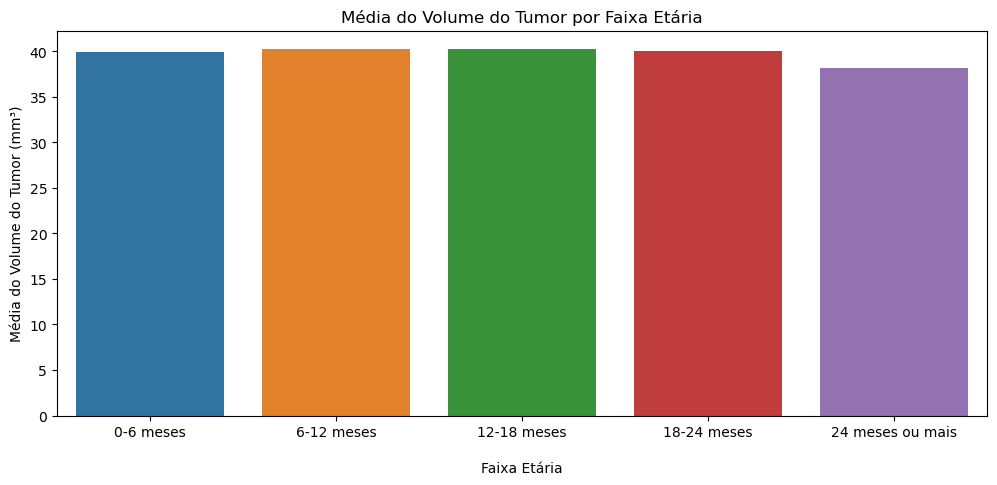

In [39]:
# Média do volume do tumor por faixa etária

# Definindo as faixas etárias
bins = [0, 6, 12, 18, 24, 30]
labels = ['0-6 meses', '6-12 meses', '12-18 meses', '18-24 meses', '24 meses ou mais']

# Divide as faixas
df_f['faixa_etaria'] = pd.cut(df_f['Idade_Meses'],
                              bins = bins,
                              labels = labels,
                              right = False)

# Agrupamento por 'faixa_etaria' e calculando a média do 'Tumor Volume (mm3)'
media_tumor = df_f.groupby('faixa_etaria')['Tumor Volume (mm3)'].mean().reset_index()

# Criando o gráfico
import seaborn as sns
plt.figure(figsize = (12, 5))
sns.barplot(x = 'faixa_etaria', y = 'Tumor Volume (mm3)', hue = 'faixa_etaria', data = media_tumor)
plt.title('Média do Volume do Tumor por Faixa Etária')
plt.xlabel('\nFaixa Etária')
plt.ylabel('Média do Volume do Tumor (mm³)')
plt.show()

**Quartis, Outliers e Boxplots**

Quartis são valores que dividem o conjunto de dados em quadro partes iguais. O primeiro quartil (Q1) é o valor que separa os 25% menores dados dos demais, o segundo quartil (Q2) ou mediana divide os dados ao meio, e o terceiro quartil (Q3) separa os 75% menores dados dos 25% maiores.

Outliers ou valores atípicos são observações que se distanciam significativamente dos outros dados do conjunto. Eles podem ser resultado de variabilidade nos dados ou de erros de medição. São importantes porque podem distorcer estatísticas e proporcionar insights sobre anomalias.

Um boxplot é um método gráfico para representar a distribuição de dados numéricos por meio de quartis. Ele mostra o mínimo, o primeiro quartil (Q1), a mediana (Q2), o terceiro quartil (Q3) e o máximo, com linhas (chamadas de "bigodes" ou whiskers) que se estendem para mostrar a variabilidade fora dos quatis. Outliers são frequêntemente indicados como pontos individuais que ficam fora dos "bigodes".

In [40]:
# Columnas
df_f.columns

Index(['ID Mouse', 'Medicamento', 'Sexo', 'Idade_Meses', 'Peso (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Sitios Metastáticos',
       'faixa_etaria'],
      dtype='object')

In [41]:
# Filtrar os dados por medicamentos
Capomulin_df = df_f.loc[df_f['Medicamento'] == "Capomulin",:]
Ramicane_df = df_f.loc[df_f['Medicamento'] == "Ramicane", :]
Infubinol_df = df_f.loc[df_f['Medicamento'] == "Infubinol", :]
Ceftamin_df = df_f.loc[df_f['Medicamento'] == "Ceftamin", :]

In [55]:
Capomulin_df.head()

,ID Mouse,Medicamento,Sexo,Idade_Meses,Peso (g),Timepoint,Tumor Volume (mm3),Sitios Metastáticos,faixa_etaria
3,m000,Capomulin,Feminino,21,23,15,38.578206,2,18-24 meses
11,m002,Capomulin,Feminino,5,15,5,42.618402,0,0-6 meses
18,m003,Capomulin,Feminino,8,19,15,38.578974,0,6-12 meses
24,m004,Capomulin,Masculino,6,28,20,39.716441,2,6-12 meses
28,m005,Capomulin,Masculino,16,27,15,40.130019,2,12-18 meses


In [45]:
# Agrupa pelo 'ID Mouse' e obtém o maior valor (o último tratamento de cada cobaia), filtrando o 'Timepoint'
Capomulin_last = Capomulin_df.groupby('ID Mouse').max()['Timepoint']

In [46]:
Capomulin_last

ID Mouse
m000    15
m002     5
m003    15
m004    20
m005    15
        ..
m094    10
m095    20
m096    20
m097     0
m098    20
Name: Timepoint, Length: 76, dtype: int64

In [51]:
# Conerte em DataFrame
capomulin_volume = pd.DataFrame(Capomulin_last)

In [52]:
# Merge com o dataframe original (queremos somente o último timepoint)
Capomulin_merge = pd.merge(capomulin_volume, Capomulin_df, on = ("ID Mouse", "Timepoint"), how = "left")

In [53]:
Capomulin_merge.head()

,ID Mouse,Timepoint,Medicamento,Sexo,Idade_Meses,Peso (g),Tumor Volume (mm3),Sitios Metastáticos,faixa_etaria
0,m000,15,Capomulin,Feminino,21.0,23.0,38.578206,2.0,18-24 meses
1,m002,5,Capomulin,Feminino,5.0,15.0,42.618402,0.0,0-6 meses
2,m003,15,Capomulin,Feminino,8.0,19.0,38.578974,0.0,6-12 meses
3,m004,20,Capomulin,Masculino,6.0,28.0,39.716441,2.0,6-12 meses
4,m005,15,Capomulin,Masculino,16.0,27.0,40.130019,2.0,12-18 meses


In [57]:
# Extrair os tumores
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

In [58]:
# Extrair os quartis
Cap_quartiles = Capomulin_tumors.quantile([0.25, 0.5, 0.75])

In [59]:
# Separa o primeiro e o terceiro quartil
Cap_lowerq = Cap_quartiles[0.25]
Cap_upperq = Cap_quartiles[0.75]

In [60]:
# Calcula o IQR (Intervalo Interquartil)
Cap_iqr = Cap_upperq - Cap_lowerq